In [1]:
import pandas as pd
import geopandas as gpd

from Continuum import create_continuum
from Continuum import open_raster_rio

import matplotlib.pyplot as plt
%matplotlib inline

import time

#### Open the ccpp's shape and keeping the needed variables

In [2]:
## Define the general path
path_d=r"C:\Users\Guillermo\Desktop/Python\01. Continuo urbano-rural\01. Dataset"

### Open the shape using geopandas
ccpp=gpd.read_file(path_d+'\\inei_centros_poblados_2017_edits.shp')
### Create a sub GeoDataFrame
ccpp=ccpp[['id','idccpp_17','pob_tot17','geometry']].copy()
### Reproject the shp to EPSG:32718
print("The points' CRS  for the ccpp is:{}".format(ccpp.crs))
ccpp=ccpp.to_crs("EPSG:32718")


The points' CRS  for the ccpp is:epsg:32718


#### Open the raster's values allocated in the band 1 and the raster's affine properties

In [3]:
### we define the right path
path_density=(path_d+"\\DensidadViviendas.tif")
band_1, aff_1=open_raster_rio(path_density)

#### Call the function create_continuum for the high, medium and low density

In [2]:
create_continuum?

Signature:
create_continuum(
    density_val_3,
    density_tif=None,
    band=None,
    affine=None,
    ccpp_shp=None,
    pob_minima=None,
    no_holes=False,
    crs_EPSG=32718,
)
Docstring:
- density_val_3: It's the density's value that will be used tu create the urban-rural continuoun
- density_tif: optinal - it's the raster's path to create the urban-rural continuoun
- band: optional - if it's provided, the function use the specified band instead of open rasterio
- affain: optional - if it's provided the function use the specified raster's affain 
- ccpp_shp: opional - it's the ccpp's shape that include population data for each ccpp
- pob_minima: opional - it's the minimun value of population accepted for creating the urban-rural continoun
- no_holes: opional - If it's True the retrived shapes haven't have any holes in their interior
- crs_EPSG: optional - Default = EPSG:32718. It's the projection value used to project the new shape
File:      c:\users\guillermo\desktop\python\0

In [5]:
start= time.time()
### Set the values for the algorithm
density_values=[3.9, 0.8, 0.13]
population_values=[50000, 5000]

## Calculate the high, medium and low continuum
high=create_continuum(density_values[0], band=band_1, affine=aff_1, ccpp_shp=ccpp, pob_minima=population_values[0], no_holes=True)
medium=create_continuum(density_values[1],band=band_1, affine=aff_1,ccpp_shp=ccpp, pob_minima=population_values[1], no_holes=True)
low=create_continuum(density_values[2], band=band_1, affine=aff_1)

end= time.time()

print("the time to execute the three continuons is:{}".format(end-start))

the time to execute the three continuons is 636.566663980484


<AxesSubplot:>

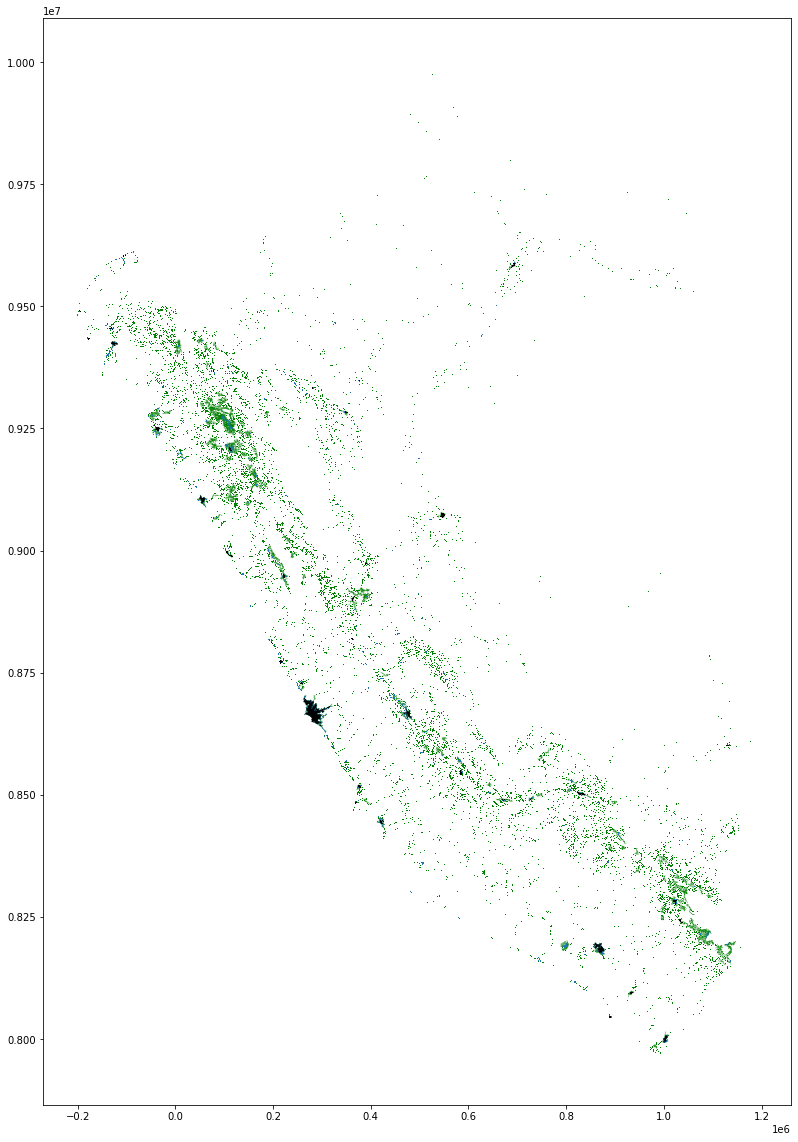

In [6]:
fig, ax=plt.subplots(figsize=(20,20))

low.plot(ax=ax, facecolor='green')
medium.plot(ax=ax)
high.plot(ax=ax,facecolor='black')

In [ ]:
## Save the shapes
high.to_file(path_d+"\\poli_alta.shp")
medium.to_file(path_d+"\\poli_media.shp")
low.to_file(path_d+"\\poli_baja_norte.shp")